# Rock-Paper-Scissors : Multiclass Image Classification

## Download Data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-11-22 18:05:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.214.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  23.2MB/s    in 8.2s    

2020-11-22 18:05:26 (23.2 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-11-22 18:05:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 74.125.31.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/

In [14]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [4]:
local_zip_path = "/tmp/rps.zip"
zip_ref = zipfile.ZipFile(local_zip_path, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()


In [5]:
local_zip_path = "/tmp/rps-test-set.zip"
zip_ref = zipfile.ZipFile(local_zip_path, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()


## Explore Folders

In [15]:
rock_dir = os.path.join("/tmp/rps/rock")
paper_dir =  os.path.join("/tmp/rps/paper")
scissors_dir =  os.path.join("/tmp/rps/scissors")

class_dir = [rock_dir, paper_dir, scissors_dir]

for fname in class_dir:
    print(f"Folder: {fname} // Number of Examples: {len(os.listdir(fname))}")
    print(f"Example: {os.listdir(fname)[:3]}")
    print("")

Folder: /tmp/rps/rock // Number of Examples: 840
Example: ['rock01-002.png', 'rock02-000.png', 'rock02-051.png']

Folder: /tmp/rps/paper // Number of Examples: 840
Example: ['paper05-112.png', 'paper01-014.png', 'paper04-063.png']

Folder: /tmp/rps/scissors // Number of Examples: 840
Example: ['testscissors03-044.png', 'scissors03-030.png', 'testscissors03-065.png']



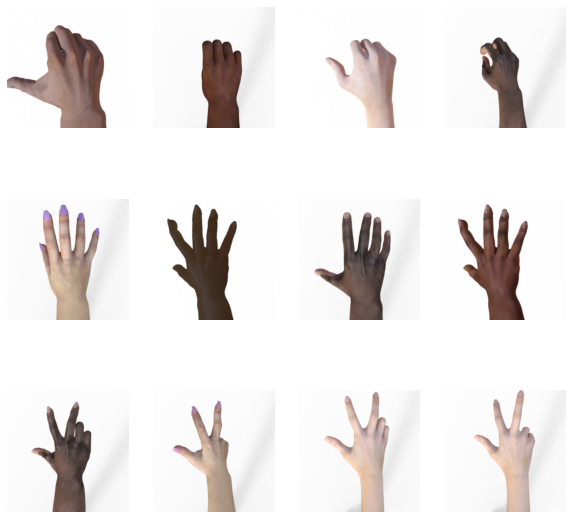

In [27]:
plot_per_class = 4
start_index = 4
display_images = []

fig, axes = plt.subplots(len(class_dir), plot_per_class, figsize=(10,10))

for i, fname in enumerate(class_dir):
    files = [os.path.join(fname, f) for f in os.listdir(fname)[start_index:start_index+plot_per_class]]
    for j, f in enumerate(files):
        img = mimg.imread(f)
        axes[i,j].imshow(img)
        axes[i,j].axis("Off")
plt.show()
    

## Preprocess and Data Augmentation

In [40]:
TRAINING_DIR = "/tmp/rps"
VALIDATION_DIR = "/tmp/rps-test-set"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               horizontal_flip=True,
                                                               fill_mode="nearest",
                                                               shear_range=0.2,
                                                               zoom_range=0.2,
                                                               rotation_range=40,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=128,
                                                   class_mode="categorical",
                                                   target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=128,
                                                             class_mode="categorical",
                                                             target_size=(150,150))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Model

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Droput(0.5)
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [42]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Training

In [ ]:
history = model.fit(train_generator,
          validation_data=validation_generator,
          steps_per_epoch=20,
          validation_steps=10,
          epochs=20,
          verbose=1)

Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 1.0994 - accuracy: 0.3940 - val_loss: 0.9076 - val_accuracy: 0.6720
Epoch 2/20
20/20 [==============================] - 24s 1s/step - loss: 0.8437 - accuracy: 0.6190
Epoch 3/20
 8/20 [===========>..................] - ETA: 14s - loss: 0.5855 - accuracy: 0.7666

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()